# **Machine Learning**

## **Tabular Data Classification using Random Forest**

In [1]:
!wget https://raw.githubusercontent.com/KiruruPoko/intro-to-python-ds-ml/refs/heads/main/Lecture%203/heart_disease_num.csv

--2025-09-25 13:35:06--  https://raw.githubusercontent.com/KiruruPoko/intro-to-python-ds-ml/refs/heads/main/Lecture%203/heart_disease_num.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 409219 (400K) [text/plain]
Saving to: ‘heart_disease_num.csv’

heart_disease_num.c 100%[===================>] 399.63K  --.-KB/s    in 0.02s   

2025-09-25 13:35:06 (17.0 MB/s) - ‘heart_disease_num.csv’ saved [409219/409219]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings

warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv('/content/heart_disease_num.csv')
df

,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,0,0,-1,0,19.04,0,0,0,1,0,0,0,3,0,0,6,43,1
1,0,0,-1,0,27.52,0,0,0,0,0,1,0,4,0,0,6,19,1
2,0,0,1,1,22.63,0,0,0,1,0,1,0,4,0,1,6,97,1
3,0,0,-1,0,27.65,0,0,0,1,0,1,0,3,0,1,5,22,1
4,0,0,0,1,29.64,1,0,0,1,0,1,0,5,0,1,5,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,0,0,0,1,28.85,1,0,0,1,0,1,0,4,0,0,6,69,1
9954,0,1,0,1,40.10,0,0,1,0,0,1,0,2,1,0,6,68,1
9955,1,1,1,1,22.29,1,0,1,0,0,1,0,2,0,0,5,73,0
9956,0,1,0,1,39.11,1,0,1,0,0,1,0,3,0,0,6,59,1


In [13]:
X = df.drop(columns = ['History of HeartDisease or Attack'], axis = 1)
y = df['History of HeartDisease or Attack']
X_train,X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # train_data = 80%, test_data = 20%
# train:val:test = 70:15:15

In [14]:
print(f"Train:      {len(X_train)} {len(X_train)/(len(X_train)+len(X_val)):.3%}")
print(f"Validation: {len(X_val)} {len(X_val)/(len(X_train)+len(X_val)):.3%}")

Train:      7966 79.996%
Validation: 1992 20.004%


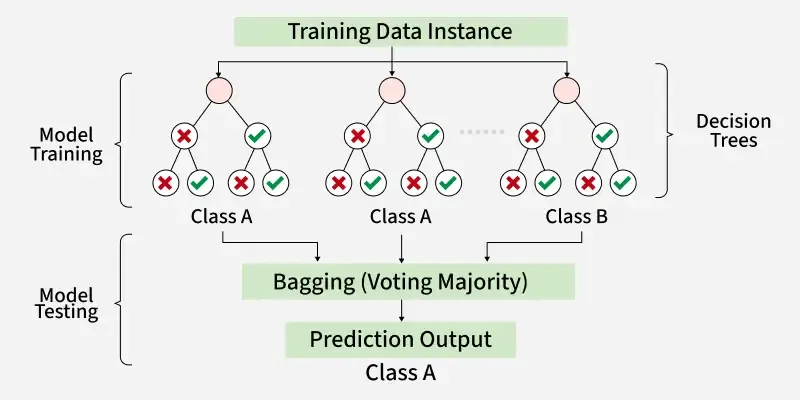

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [16]:
print(f"{round(accuracy_score(y_val, y_pred) * 100, 2)}%")

91.32%


In [17]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        14
           0       0.92      0.99      0.95      1819
           1       0.48      0.06      0.11       159

    accuracy                           0.91      1992
   macro avg       0.46      0.35      0.36      1992
weighted avg       0.88      0.91      0.88      1992



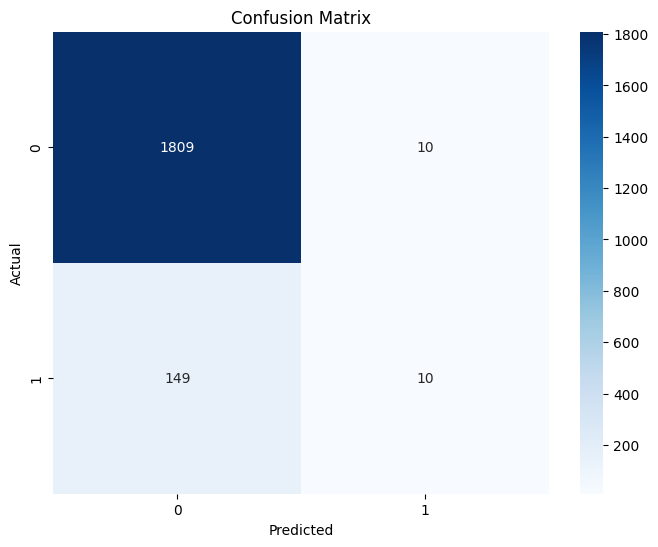

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out the -1 class from both true and predicted labels
y_val_filtered = y_val[y_val != -1]
y_pred_filtered = y_pred[y_val != -1] # Filter y_pred based on the same indices as y_val

# Generate the confusion matrix
cm = confusion_matrix(y_val_filtered, y_pred_filtered)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### **Without unknown data in heart disease**

In [20]:
know_df = df[df['History of HeartDisease or Attack'] != -1]
know_df = know_df.reset_index(drop = True)
print(know_df.shape)
know_df.head()

(9877, 18)


,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,0,0,-1,0,19.04,0,0,0,1,0,0,0,3,0,0,6,43,1
1,0,0,-1,0,27.52,0,0,0,0,0,1,0,4,0,0,6,19,1
2,0,0,1,1,22.63,0,0,0,1,0,1,0,4,0,1,6,97,1
3,0,0,-1,0,27.65,0,0,0,1,0,1,0,3,0,1,5,22,1
4,0,0,0,1,29.64,1,0,0,1,0,1,0,5,0,1,5,18,1


In [21]:
X2 = know_df.drop(columns = ['History of HeartDisease or Attack'], axis = 1)
y2 = know_df['History of HeartDisease or Attack']
X2_train,X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X2_train, y2_train)
y2_pred = model.predict(X2_val)

In [24]:
print(f"{accuracy_score(y2_pred, y2_val)*100}%")

91.95344129554655%


In [25]:
print(classification_report(y2_pred, y2_val))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1949
           1       0.09      0.52      0.15        27

    accuracy                           0.92      1976
   macro avg       0.54      0.72      0.55      1976
weighted avg       0.98      0.92      0.95      1976



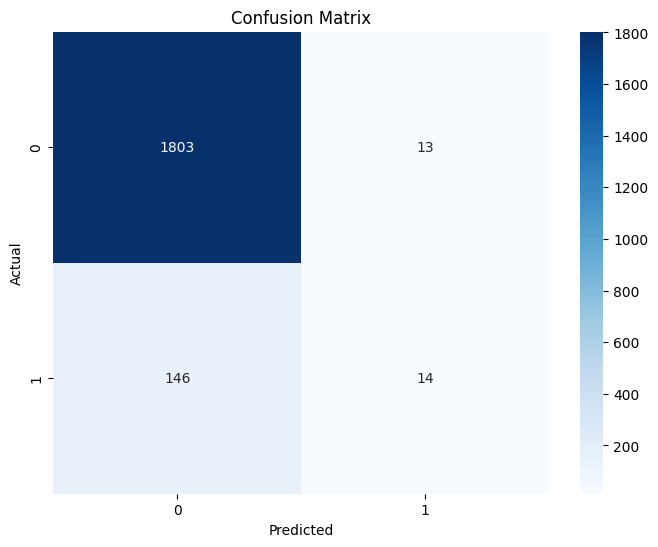

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Generate the confusion matrix
cm = confusion_matrix(y2_val, y2_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **Image Classification (MNIST) using Neural Network**

Notebook taken from: [MNIST - Deep Neural Network with Keras](https://www.kaggle.com/code/prashant111/mnist-deep-neural-network-with-keras)

In [28]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras.datasets import mnist

In [29]:
(X_train, y_train),(X_test, y_test) = mnist.load_data() # X = image, y = label

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [30]:
df_mnist = pd.Series(y_train)

In [31]:
df_mnist.value_counts().sort_index()

,count
0,5923
1,6742
2,5958
3,6131
4,5842
5,5421
6,5918
7,6265
8,5851
9,5949


In [32]:
X_train.shape

(60000, 28, 28)

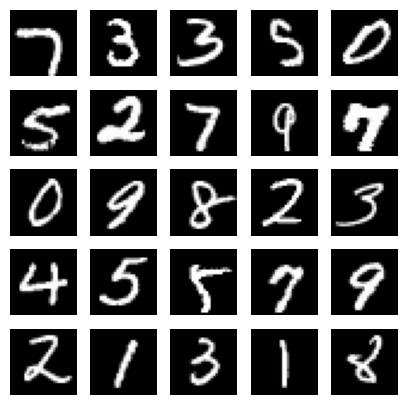

In [36]:
indexes = np.random.randint(0, X_train.shape[0], size=25)
images = X_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [37]:
num_labels = len(np.unique(y_train))

Convert label 1-dimension vector -> 10 dimensions vector Ex. [2] -> [0,0,1,0,0,0,0,0,0,0]

In [39]:
# convert to one-hot vector
from keras.utils import to_categorical, plot_model
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [40]:
# Assume Image is square
image_size = X_train.shape[1]
input_size = image_size * image_size
input_size

784

In [41]:
X_train = np.reshape(X_train, [-1, input_size])
X_train = X_train.astype('float32') / 255
X_test = np.reshape(X_test, [-1, input_size])
X_test = X_test.astype('float32') / 255

In [43]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [44]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

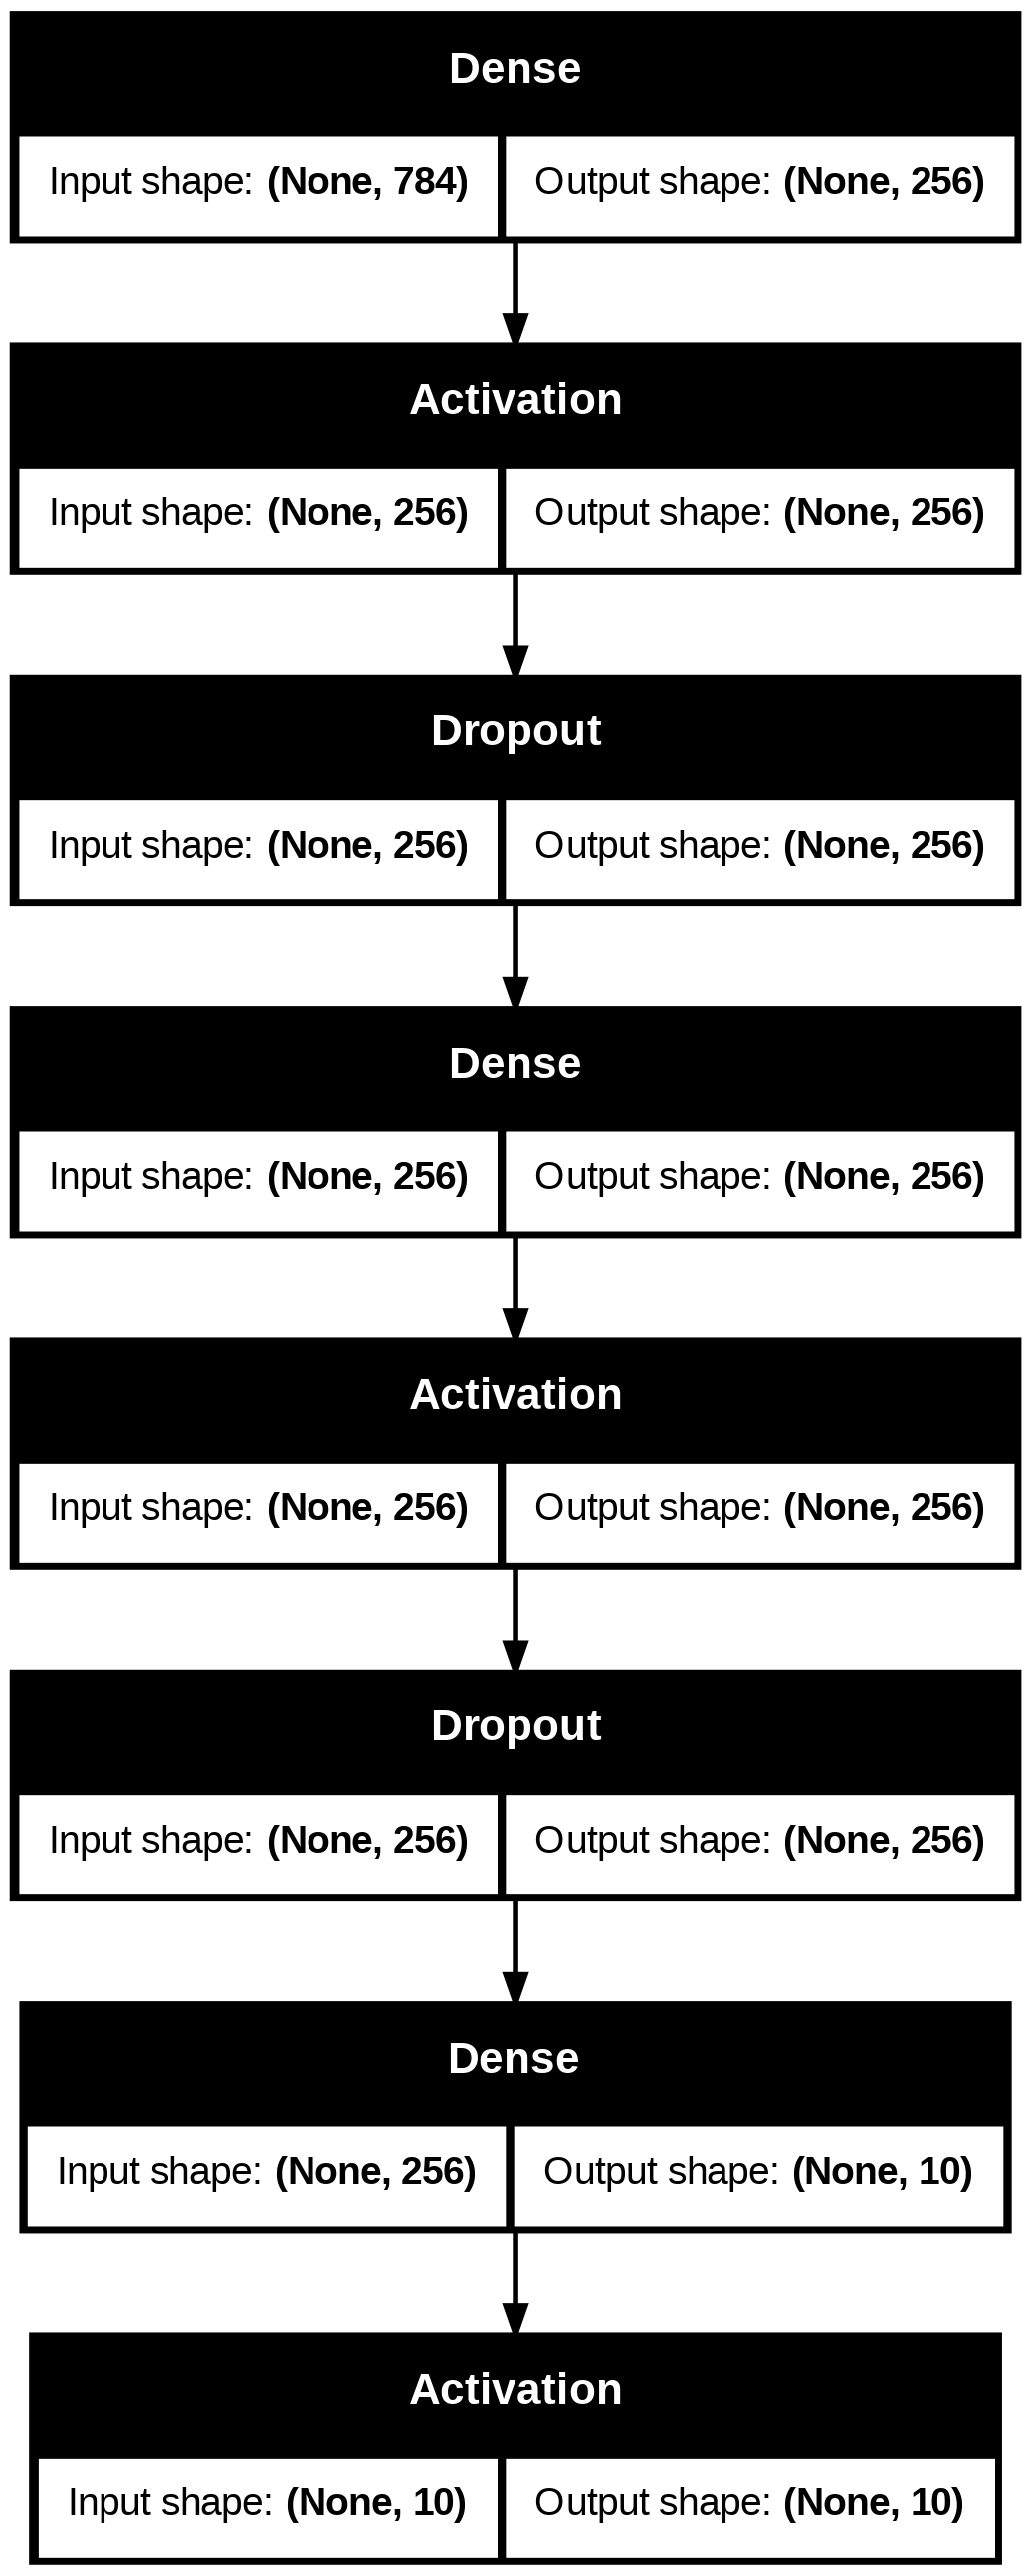

In [35]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [46]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [47]:
model.fit(X_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7686 - loss: 0.7296
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9389 - loss: 0.2091
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9541 - loss: 0.1515
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9588 - loss: 0.1361
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9664 - loss: 0.1148
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9683 - loss: 0.1013
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9712 - loss: 0.0920
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9730 - loss: 0.0861
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9757 - loss: 0.0796
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9756 - loss: 0.0753
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9778 - loss: 0.0700
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

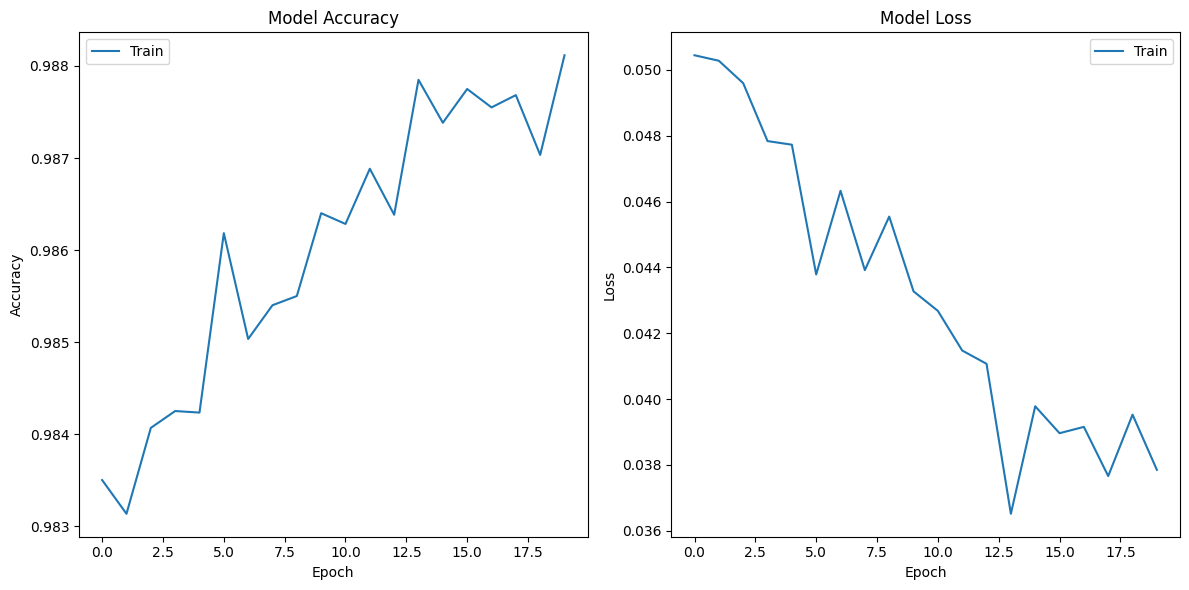

In [48]:
# Access the history from the trained model
history = model.fit(X_train, y_train, epochs=20, batch_size=batch_size, verbose=0) # Re-run fit to get history

# Plot training accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')

plt.tight_layout()
plt.show()

In [49]:
loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9804 - loss: 0.0778

Test accuracy: 98.4%


In [50]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(X_test)

# Convert one-hot encoded y_test back to integer labels
y_test_labels = np.argmax(y_test, axis=1)

# Convert predicted probabilities y_pred to predicted integer labels
y_pred_labels = np.argmax(y_pred, axis=1)

print(classification_report(y_test_labels, y_pred_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# **Credits**

AI Builders "บทที่ 1 - Machine Learning" คืออะไร: [Youtube](https://www.youtube.com/watch?v=4-PHm7-XIjE&t=360s)\
Super AI Engineer Season 5 Round 1 Hackathon [Data Science: Heart Disease Prediction](https://www.kaggle.com/competitions/hearth-disease-recognition)\
[MNIST - Deep Neural Network with Keras](https://www.kaggle.com/code/prashant111/mnist-deep-neural-network-with-keras)